In [ ]:
from google.colab import files
files.upload()

#BASIC INFORMATION

In [4]:
import pandas as pd
df=pd.read_csv('sql_loan_data.csv')
df.head()

,age,income,ownership,emp,intend,grade,amount,intrest,status,percent,default,history,cust_id,risk
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000.0,16.02,1.0,0.593220,Y,3.0,1,73.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.104167,N,2.0,2,31.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.572917,N,3.0,3,51.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000.0,15.23,1.0,0.534351,N,2.0,4,52.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000.0,14.27,1.0,0.643382,Y,4.0,5,72.0


In [5]:
print(f'Total rows are {df.shape [0]} and total columns are {df.shape[1]}')

Total rows are 32581 and total columns are 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        32581 non-null  float64
 1   income     32581 non-null  float64
 2   ownership  32581 non-null  object 
 3   emp        32581 non-null  float64
 4   intend     32581 non-null  object 
 5   grade      32581 non-null  object 
 6   amount     32581 non-null  float64
 7   intrest    32581 non-null  float64
 8   status     32581 non-null  float64
 9   percent    32581 non-null  float64
 10  default    32581 non-null  object 
 11  history    32581 non-null  float64
 12  cust_id    32581 non-null  int64  
 13  risk       32581 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 3.5+ MB


In [7]:
df.describe()

,age,income,emp,amount,intrest,status,percent,history,cust_id,risk
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.704797,64335.810626,4.767994,9589.371106,11.009620,0.218164,0.170764,5.804211,16291.000000,40.097265
std,6.151671,37806.237543,4.087372,6322.086646,3.081611,0.413006,0.106866,4.055001,9405.468897,12.021355
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.004440,2.000000,1.000000,21.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,8146.000000,32.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.148148,4.000000,16291.000000,37.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.229167,8.000000,24436.000000,46.000000
max,70.000000,225200.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,32581.000000,88.000000


#CHECKING DISTRIBUTION VIA PLOTS

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.columns

Index(['age', 'income', 'ownership', 'emp', 'intend', 'grade', 'amount',
       'intrest', 'status', 'percent', 'default', 'history', 'cust_id',
       'risk'],
      dtype='object')

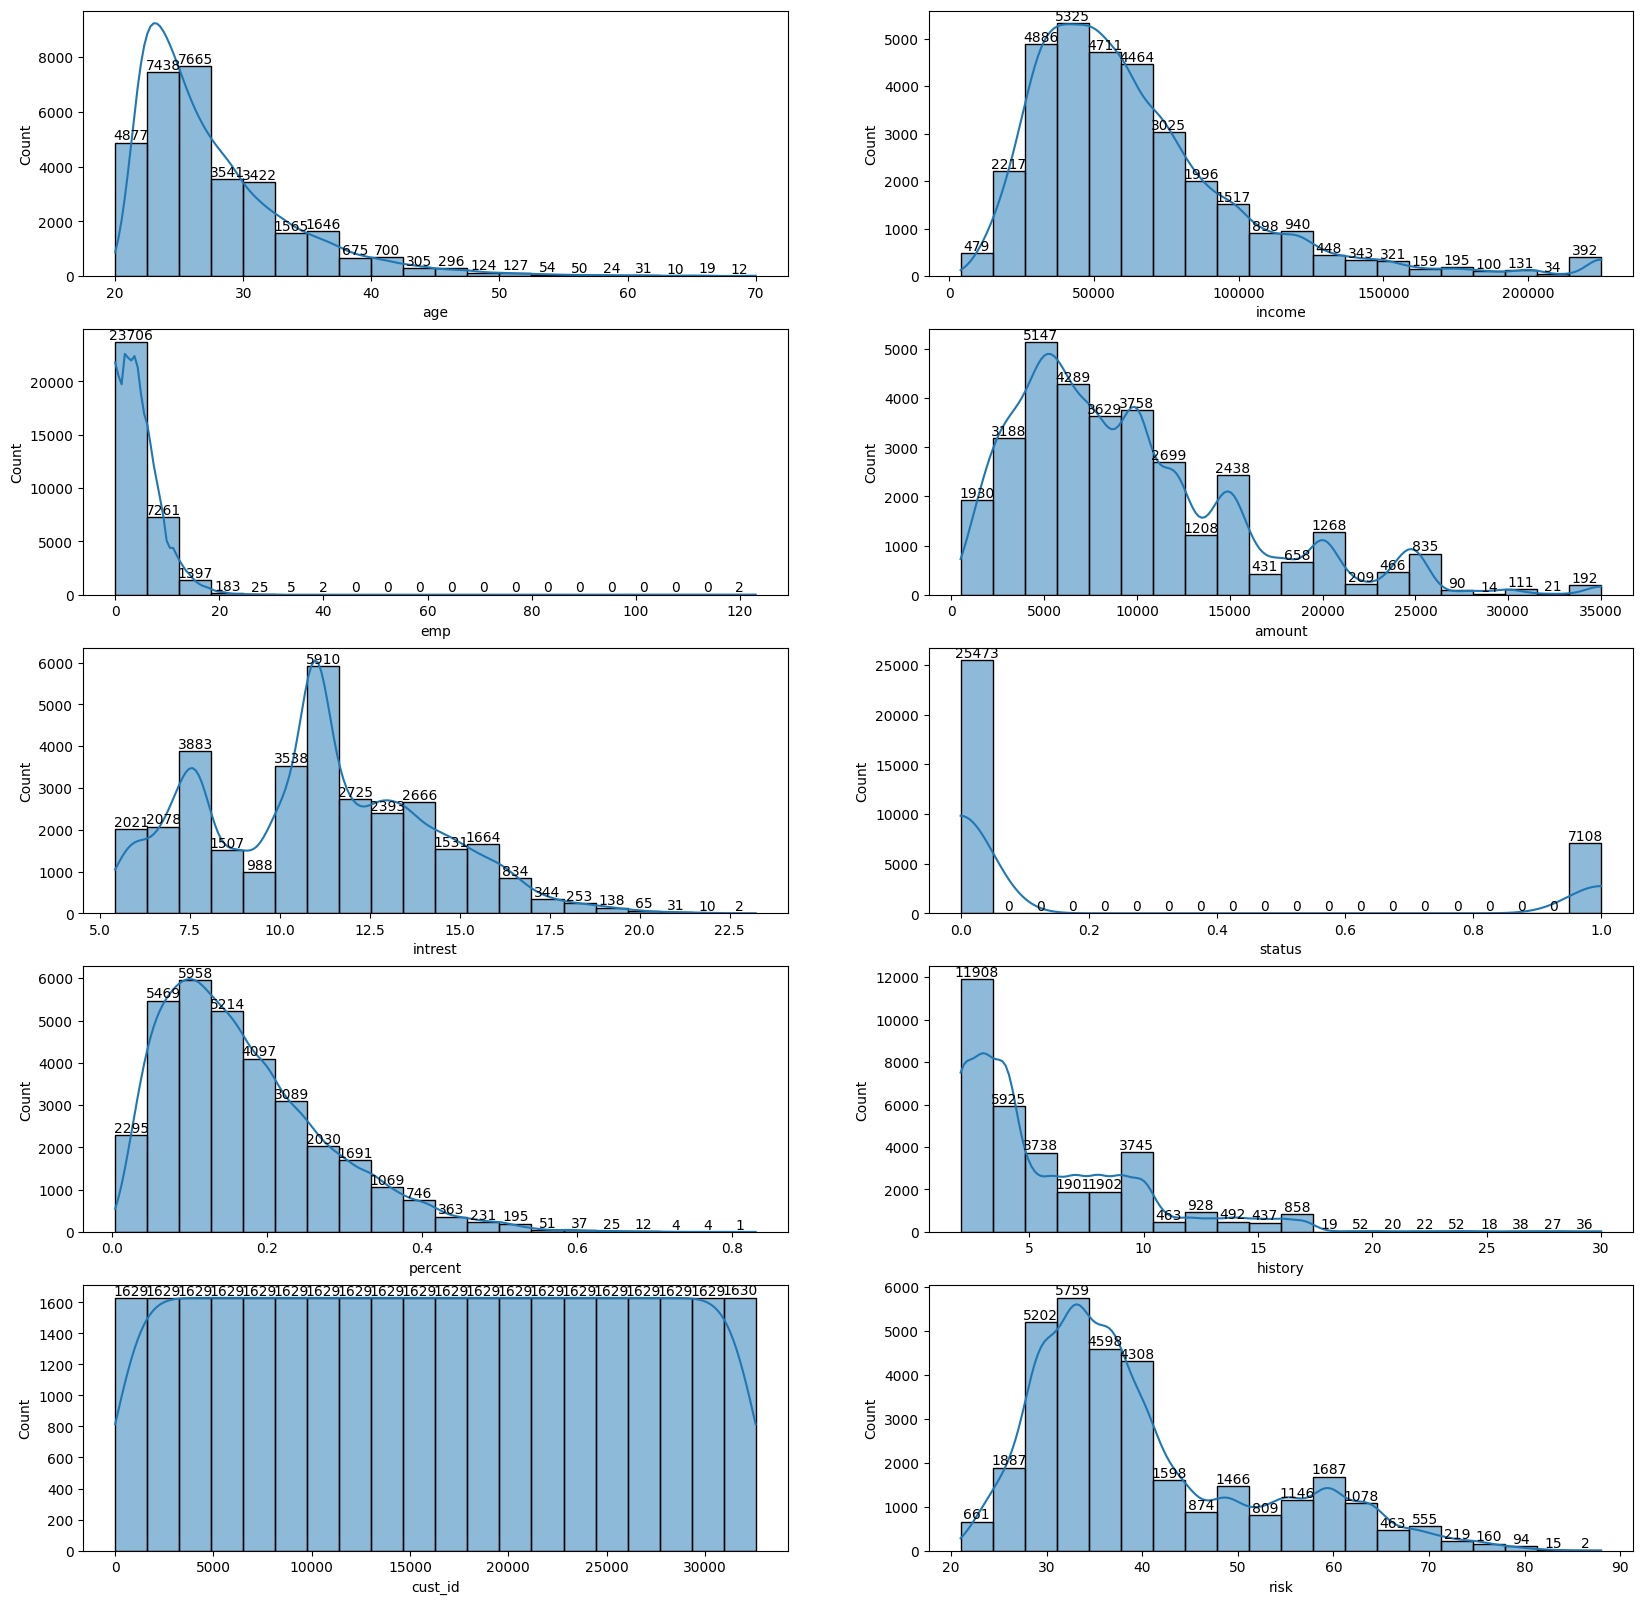

In [33]:
numeric_columns=['age','income', 'emp','amount','intrest', 'status', 'percent','history', 'cust_id','risk']
fig=plt.figure(figsize=(20,20))
for index ,cols in enumerate(numeric_columns):
  i=index+1
  fig.add_subplot(5,2,i)
  ax=sns.histplot(df[cols],kde=True,bins=20)
  for container in ax.containers:
    ax.bar_label(container)

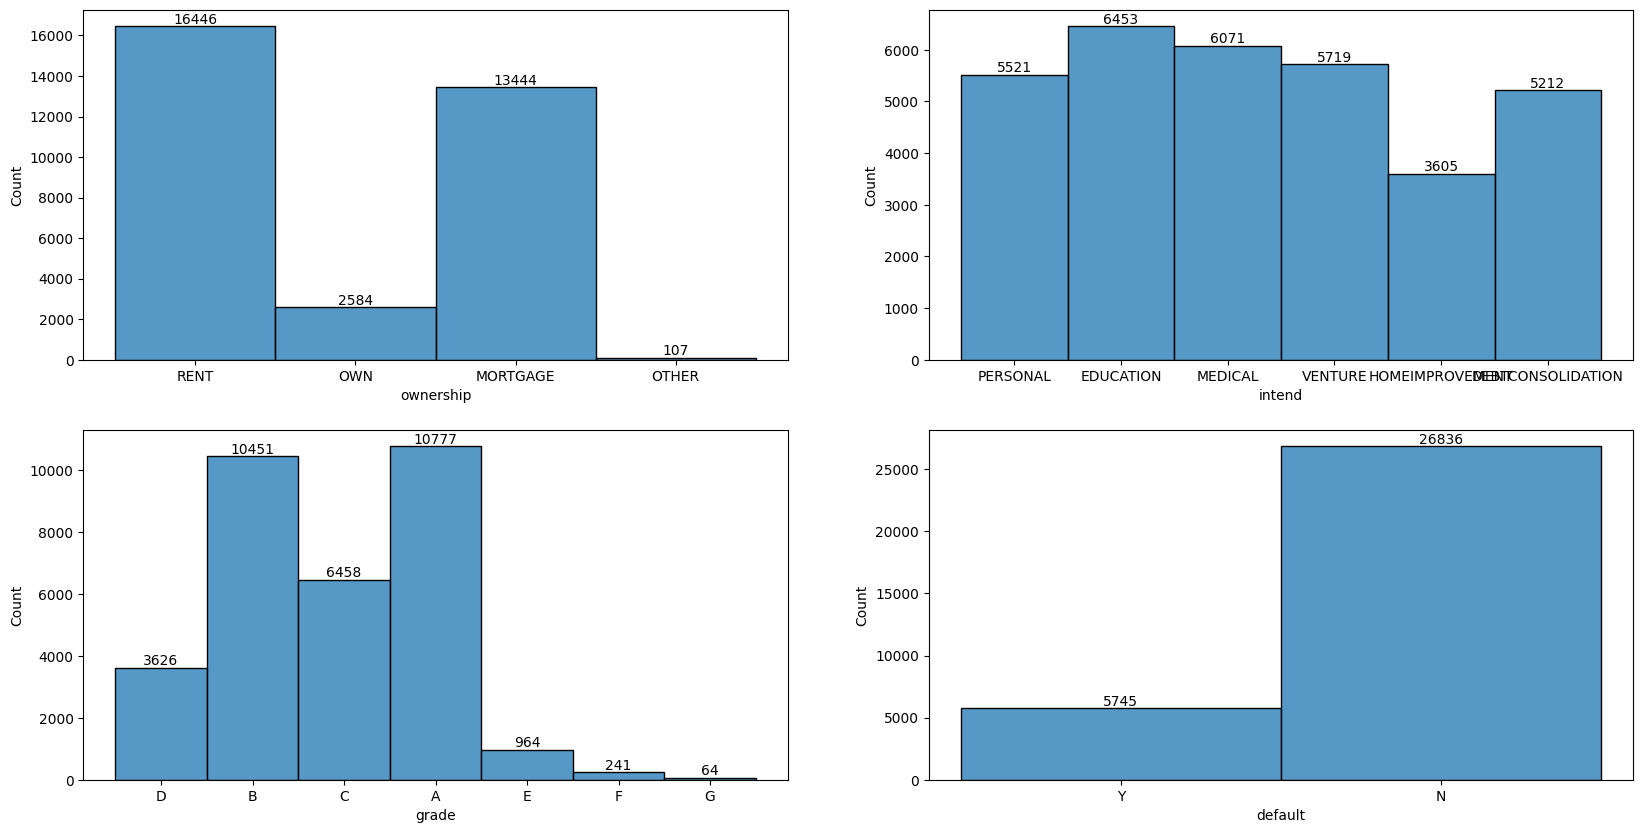

In [37]:
non_numeric=['ownership','intend', 'grade','default']
fig=plt.figure(figsize=(20,10))
for index ,cols in enumerate(non_numeric):
  i=index+1
  fig.add_subplot(2,2,i)
  ax=sns.histplot(df[cols])
  for container in ax.containers:
    ax.bar_label(container)

##--OUTLIERS

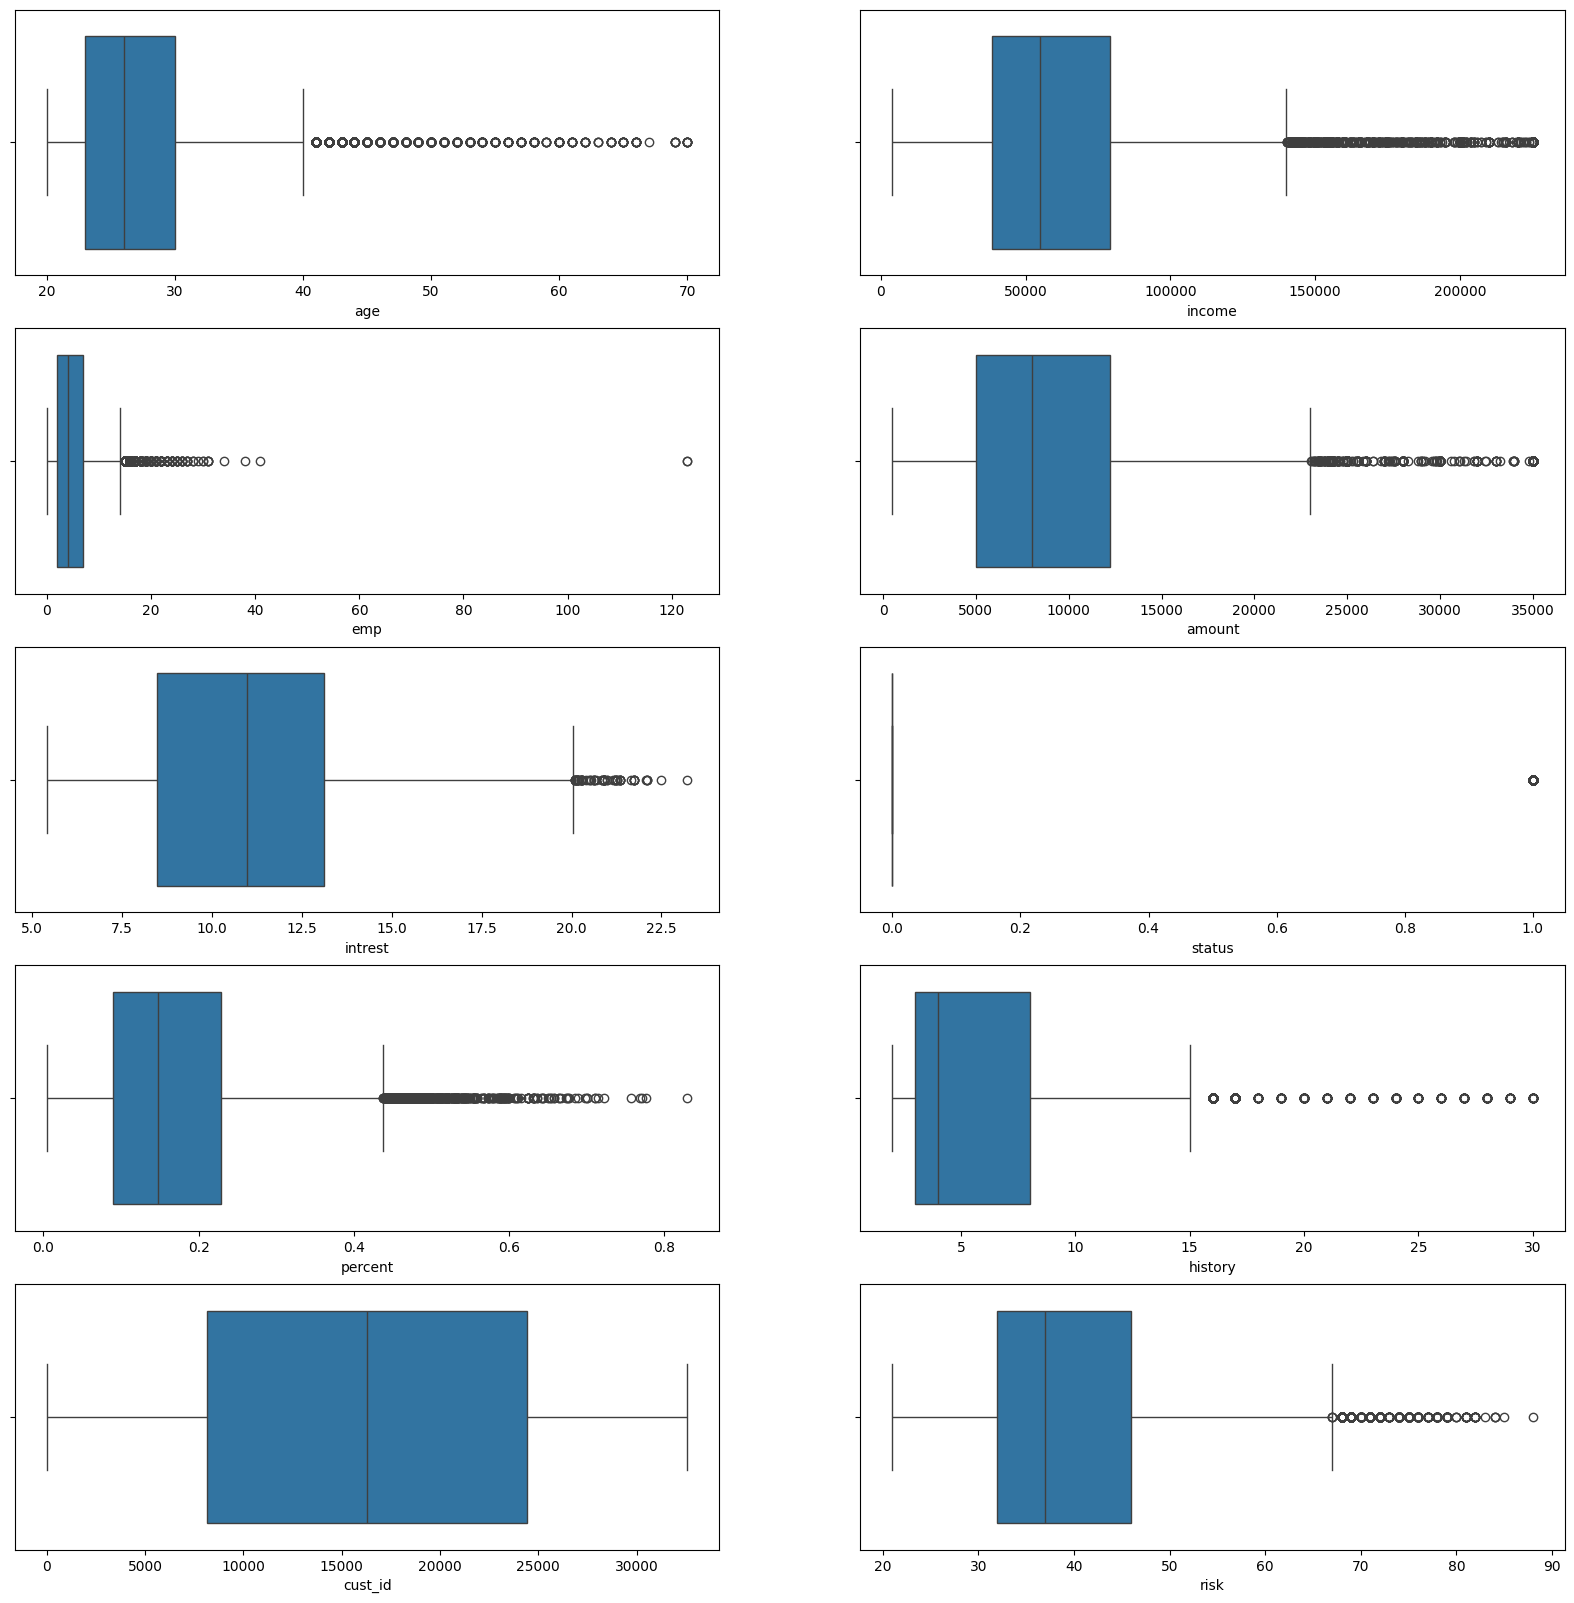

In [41]:
numeric_columns=['age','income', 'emp','amount','intrest', 'status', 'percent','history', 'cust_id','risk']
fig=plt.figure(figsize=(20,20))
for index ,cols in enumerate(numeric_columns):
  i=index+1
  fig.add_subplot(5,2,i)
  ax=sns.boxplot(x=df[cols])

In [42]:
df['emp'].max()

123.0